In [2]:
import tensorflow 
from tensorflow import keras
from keras.layers import Dense,Flatten,Conv2D,AveragePooling2D
from keras import Sequential
from keras.datasets import mnist

In [3]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

LeNet Architecture

In [4]:
model = Sequential()
model.add(Conv2D(6,kernel_size = 5,strides = 1,padding = 'valid',activation = 'tanh',input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size = 2,strides = 2))

model.add(Conv2D(16,kernel_size = 5,strides = 1,padding = 'valid',activation = 'tanh'))
model.add(AveragePooling2D(pool_size = 2,strides = 2))

model.add(Flatten())

model.add(Dense(120,activation = 'tanh'))

model.add(Dense(84,activation = 'tanh'))

model.add(Dense(10,activation = 'softmax'))


C:\Users\princ\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 6)      │           156 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d               │ (None, 12, 12, 6)      │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 8, 8, 16)       │         2,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ average_pooling2d_1             │ (None, 4, 4, 16)       │             0 │
│ (AveragePooling2D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 120)            │        30,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 84)             │        10,164 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           850 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 44,426 (173.54 KB)

 Trainable params: 44,426 (173.54 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
model.fit(X_train,y_train,epochs = 5,validation_data=(X_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9855 - loss: 0.0456 - val_accuracy: 0.9861 - val_loss: 0.0441
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9890 - loss: 0.0347 - val_accuracy: 0.9871 - val_loss: 0.0433
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9906 - loss: 0.0305 - val_accuracy: 0.9864 - val_loss: 0.0455
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 0.9865 - val_loss: 0.0442
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9928 - loss: 0.0226 - val_accuracy: 0.9871 - val_loss: 0.0414


In [10]:
import numpy as np
# Making predictions on the test set
y_pred = model.predict(X_test)

# Convert the predictions from probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

# Display some predictions
print("Predicted labels:", y_pred_classes[:10])
print("Actual labels:   ", y_test[:10])


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Predicted labels: [7 2 1 0 4 1 4 9 5 9]
Actual labels:    [7 2 1 0 4 1 4 9 5 9]


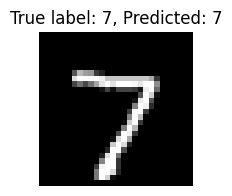

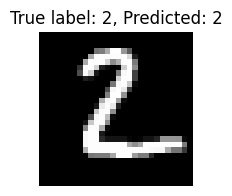

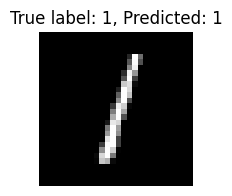

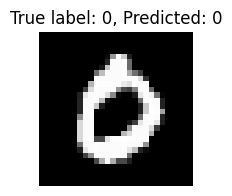

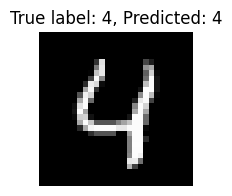

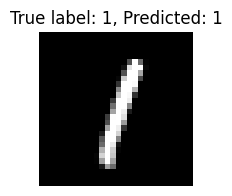

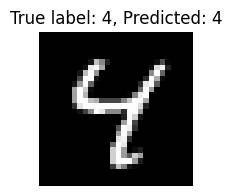

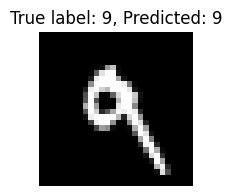

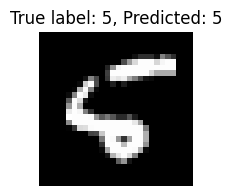

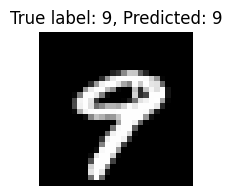

In [11]:
import matplotlib.pyplot as plt

# Function to plot the images along with predicted and actual labels
def plot_sample(X, y_true, y_pred, index):
    plt.figure(figsize=(4, 2))
    plt.imshow(X[index].reshape(28, 28), cmap='gray')
    plt.title(f"True label: {y_true[index]}, Predicted: {y_pred[index]}")
    plt.axis('off')
    plt.show()

# Plot some sample images along with their predictions
for i in range(10):
    plot_sample(X_test, y_test, y_pred_classes, i)


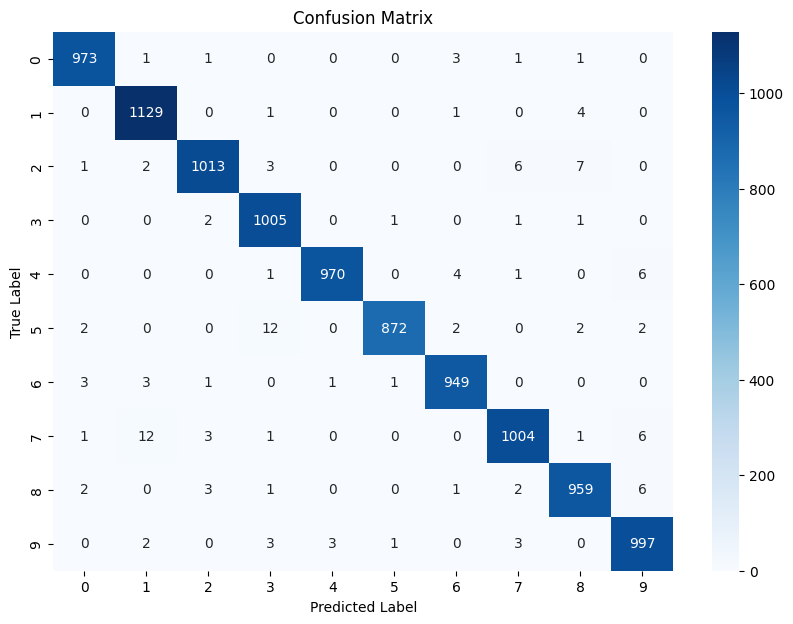

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
